## Î™®Îìà Ï∂îÍ∞Ä
----- 

In [13]:
import cv2, os
import matplotlib.pyplot as plt
import numpy as np
import dlib, math

## ÏñºÍµ¥Ïù∏ÏãùÌïòÍ∏∞
------


### ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞

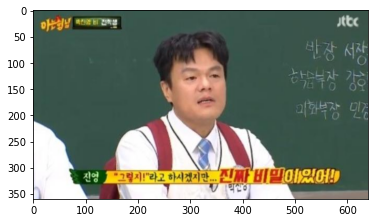

In [4]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/jyp1.jpg'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show) 
plt.show()

### Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏñºÍµ¥Ïù∏ÏãùÌïòÍ∏∞

In [5]:
detector_hog = dlib.get_frontal_face_detector()

rectangles[[(270, 92) (378, 199)]]


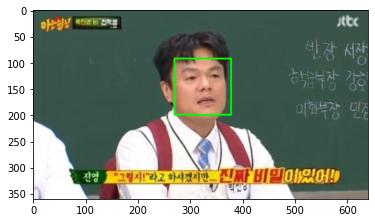

In [6]:
dlib_rects = detector_hog(img_show, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
plt.imshow(img_show)
plt.show()

### face landmark Î™®Îç∏ Ï∂îÍ∞Ä

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


### face landmark ÏÉùÏÑ± Î∞è ÌëúÌòÑ

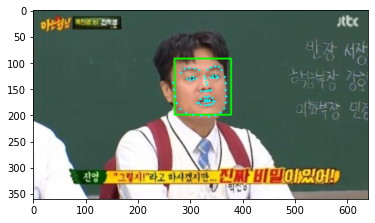

68


In [8]:
list_landmarks = []
# ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÌïòÏó¨ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show)
plt.show()    
print(len(list_landmarks[0]))

#### ÎûúÎìúÎßàÌÅ¨Ïùò Î≤àÌò∏Î≥Ñ ÏúÑÏπò

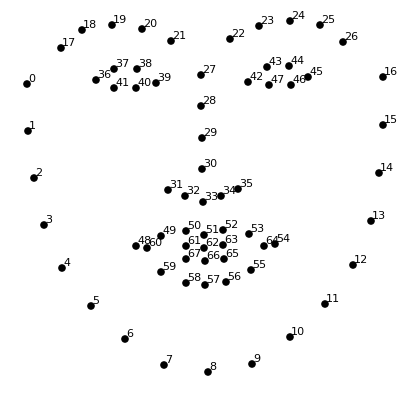

### Ïä§Ìã∞Ïª§ Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Îê† ÎûúÎìúÎßàÌÅ¨ ÏßÄÏ†ï 

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # Ïù¥ÎØ∏ÏßÄ Îì§Ïñ¥Í∞à ÎûúÎìúÎßàÌÅ¨
    x_nose = landmark[33][0]
    y_nose = landmark[33][1]
    x_right = landmark[14][0]
    y_bottom = landmark[8][1]
    # Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÍ∏∞ ÏúÑÌïú ÎûúÎìúÎßàÌÅ¨ 
    x_left_eye = landmark[2][0]
    y_left_eye = landmark[2][1]
    x_right_eye = landmark[14][0]
    y_right_eye = landmark[14][1]
    
    print(f'x_nose, y_nose: {x_nose, y_nose}')
    print(f'(x_right): {x_right }')
    print(f'(y_bottm): {y_bottom}')
    print(f'(x_right_eye, y_right_eye): {x_right_eye},{y_right_eye}')
    print(f'(x_left_eye, y_left_eye): {x_left_eye},{y_left_eye}')

x_nose, y_nose: (332, 154)
(x_right): 368
(y_bottm): 202
(x_right_eye, y_right_eye): 368,152
(x_left_eye, y_left_eye): 271,164


## Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î∞∞Í≤Ω Ï†úÍ±∞ ÌõÑ Ìï©ÏÑ±ÌïòÍ∏∞
-----

### Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î°úÎìú / Î¶¨ÏÇ¨Ïù¥Ïßï / Í∏∞Ïö∏Ïù¥Í∏∞
> Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î¶¨ÏÇ¨Ïù¥Ïßï Ìï† Îïå **ÏΩîÎÅùÏù¥ Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò Ï†ïÏ§ëÏïô**Ïóê ÏúÑÏπòÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥
**Ïò§Î•∏Ï™Ω Î≥º ÎÅùÏùò xÏ¢åÌëú - ÏΩîÏùò xÏ¢åÌëú**, ÌÑ±ÎÅùÏù∏ **ÎûúÎìúÎßàÌÅ¨ 8Î≤àÏùò yÏ¢åÌëú - ÏΩîÏùò yÏ¢åÌëú** Î•º Ìïú ÌõÑ
Í∞ÅÍ∞ÅÏùò Í∞íÏùÑ **2Î∞∞**ÌïòÏó¨ **Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò x,yÏ†ÑÏ≤¥ Í∏∏Ïù¥Î°ú ÏÑ§Ï†ï**ÌïòÏòÄÎã§.

* Ïù¥ÎØ∏ÏßÄ Í∏∞Ïö∏Ïù¥Í∏∞Îäî [Ï†ÑÏßÄÏùÄ ÏàòÍ∞ïÏÉùÏùò agit Í≤åÏãúÍ∏Ä](https://aiffel.agit.io/g/300308438/wall/324059380)Í≥º [gramman document](https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html) Ï∞∏Ï°∞

half_y, half_x: 50, 46
h, w: 2, 136
angle: 0.8425242607404145
M: [[ 0.99989189  0.01470429 -0.67099175]
 [-0.01470429  0.99989189  0.74018786]]


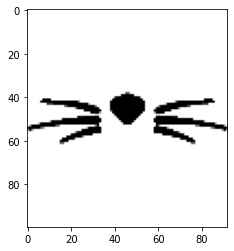

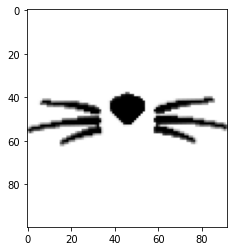

In [81]:
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png'
img_sticker = cv2.imread(sticker_path)

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
size_ratio = 1.5 # Ïù¥ Í∞íÏùÑ Ï°∞Ï†àÌïòÏó¨ Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÎπÑÏú®Î°ú Ï†ïÌï† Ïàò ÏûàÎã§.
half_x , half_y = round((x_right - x_nose)*size_ratio), round((y_bottom - y_nose)*size_ratio) # Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄÏùò Í∞ÄÎ°ú,ÏÑ∏Î°ú 1/2 Í∏∏Ïù¥ ÏÇ∞Ï∂ú
print(f'half_y, half_x: {half_y}, {half_x}')
img_sticker = cv2.resize(img_sticker, (half_x * 2, half_y * 2)) # ÏñºÍµ¥ Ïù∏Ïãù ÏòÅÏó≠Ïóê ÎßûÏ∂∞ÏÑú Ïä§Ìã∞Ïª§ÌÅ¨Í∏∞ Ï°∞Ï†ï

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Í∏∞Ïö∏Ïù¥Í∏∞
h =  y_right_eye - y_left_eye
w =  x_right_eye - x_left_eye
print(f'h, w: {h}, {w}')
angle = math.atan(h/w)/math.pi*180 
if angle < 0:
    angle = -angle
print(f'angle: {angle}')
M = cv2.getRotationMatrix2D((img_sticker.shape[0]/2,img_sticker.shape[1]/2), angle, 1.0)
print(f'M: {M}')
rot_sticker = cv2.warpAffine(img_sticker, M,(img_sticker.shape[1], img_sticker.shape[0]), borderValue=(255,255,255))
plt.imshow(img_sticker)
plt.show()
plt.imshow(rot_sticker)
plt.show()

### Ïä§Ìã∞Ïª§ ÏòÅÏó≠ ÏÑ§Ï†ï

(refind_x_left,right): (278, 386)
(refind_y_top,bottm): (82, 226)
sticker_area


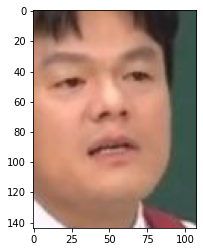

In [49]:
# sticker_area ÏÑ§Ï†ï: y,xÏàú
refind_y_top = y_nose - half_y # ÏΩîÏùò xÏ¢åÌëúÏóêÏÑú ÏïûÏÑú Íµ¨Ìïú Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò yÏ∂ï Ï†àÎ∞òÏùò Í∏∏Ïù¥Î•º ÎπºÏÑú yÏ¢åÌëú ÏõêÏ†êÏùÑ Íµ¨ÌïúÎã§.
refind_y_bottom = refind_y_top + img_sticker.shape[0] 
refind_x_left = x_nose - half_x # ÏΩîÏùò xÏ¢åÌëúÏóêÏÑú ÏïûÏÑú Íµ¨Ìïú Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò xÏ∂ï Ï†àÎ∞òÏùò Í∏∏Ïù¥Î•º ÎπºÏÑú xÏ¢åÌëú ÏõêÏ†êÏùÑ Íµ¨ÌïúÎã§.
refind_x_right = refind_x_left + img_sticker.shape[1]
print(f'(refind_x_left,right): {refind_x_left, refind_x_right }')
print(f'(refind_y_top,bottm): {refind_y_top, refind_y_bottom}')

# img_rgbÏóêÏÑú stickerÍ∞Ä Î∂ôÏùÑ ÏòÅÏó≠ ÏßÄÏ†ïÌïòÍ∏∞
sticker_area = img_rgb[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right]
print('sticker_area')
plt.imshow(sticker_area)
plt.show()

### Ïä§Ìã∞Ïª§Ïù¥ÎØ∏ÏßÄÏùò Î∞∞Í≤Ω Ï†úÍ±∞ÌõÑ Ïä§Ìã∞Ïª§ ÏòÅÏó≠Ïóê Ìï©ÏπòÍ∏∞
* [gramman 0.1 documentation - Ïù¥ÎØ∏ÏßÄÏó∞ÏÇ∞](https://opencv-python.readthedocs.io/en/latest/doc/07.imageArithmetic/imageArithmetic.html) Ï∞∏Ï°∞
 

sticker_area


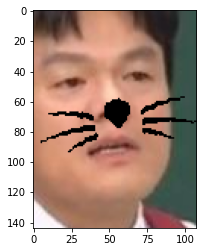

In [52]:
#maskÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú img1ÏùÑ grayÎ°ú Î≥ÄÍ≤Ω ÌõÑ, 
mask = cv2.cvtColor(rot_sticker, cv2.COLOR_BGR2GRAY)
#ret, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)


#bitwise_and Ïó∞ÏÇ∞ÏûêÎäî ÎëòÎã§ 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå Í∞íÏùÑ ÌÜµÍ≥º ÏãúÌÇ¥.
#Ï¶â maskÍ∞Ä Í≤ÄÏ†ïÏÉâÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌÜµÍ≥ºÍ∞Ä ÎêòÍ∏∞ÎïåÎ¨∏Ïóê maskÏòÅÏó≠ Ïù¥Ïô∏Îäî Î™®Îëê Ï†úÍ±∞Îê®.
sticker_area = cv2.bitwise_and(sticker_area, sticker_area, mask=mask)

print('sticker_area')
plt.imshow(sticker_area)
plt.show()

### Ïä§Ìã∞Ïª§ ÏòÅÏó≠ÏùÑ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ìï©ÏπòÍ∏∞

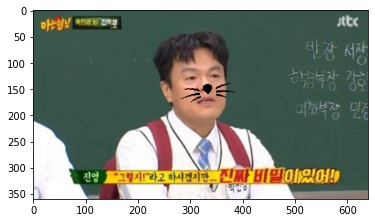

In [53]:
img_rgb[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right] = np.where(sticker_area == 1, sticker_area, sticker_area).astype(np.uint8)
plt.imshow(img_rgb)
plt.show()

## Îã§Î•∏ Ï°∞Í±¥ÏúºÎ°ú ÌÖåÏä§Ìä∏
-----

### 1. Î∞òÎåÄÎ∞©Ìñ•Ïùò ÏñºÍµ¥

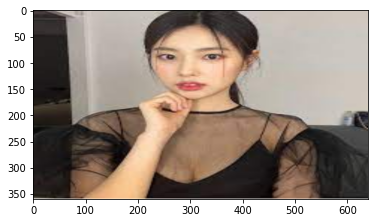

In [106]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/hyemmu2.jpeg'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show_hyem = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show_hyem = cv2.cvtColor(img_show_hyem, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb_hyem = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_hyem) 
plt.show()

rectangles[[(225, 53) (354, 182)]]


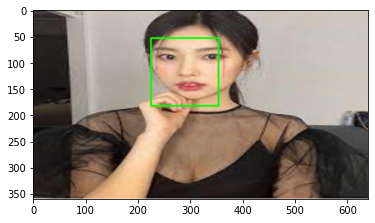

In [107]:
dlib_rects_hyem = detector_hog(img_show_hyem, 1)

print(dlib_rects_hyem)

for dlib_rect in dlib_rects_hyem:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show_hyem,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
plt.imshow(img_show_hyem)
plt.show()

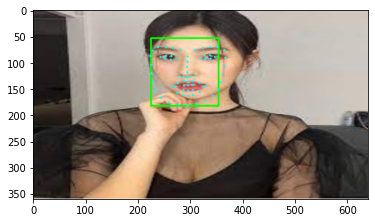

In [108]:
list_landmarks_hyem = []
# ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÌïòÏó¨ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects_hyem:
    points = landmark_predictor(img_show_hyem, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_hyem.append(list_points)

# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ
for landmark in list_landmarks_hyem:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_hyem, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show_hyem)
plt.show()

x_nose, y_nose: (294, 128)
(x_right): 362
(y_bottm): 181
80 102


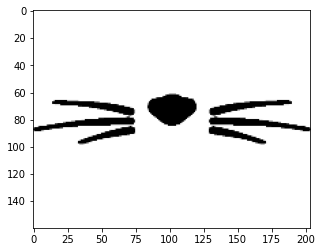

h, w: 2, 136
angle: -0.8425242607404145
M: [[ 0.99989189 -0.01470429  1.50848695]
 [ 0.01470429  0.99989189 -1.16531577]]


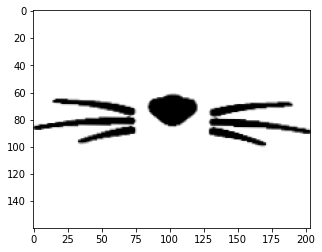

(refind_x_left,right): (192, 396)
(refind_y_top,bottm): (48, 208)
sticker_area


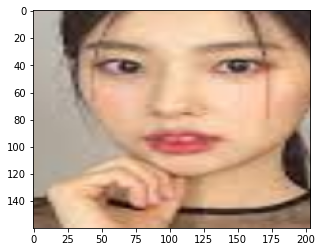

In [109]:
# Ïù¥ÎØ∏ÏßÄ Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Îê† ÎûúÎìúÎßàÌÅ¨ ÏßÄÏ†ï
for dlib_rects_hyem, list_landmarks_hyem  in zip(dlib_rects_hyem, list_landmarks_hyem):
    # Ïù¥ÎØ∏ÏßÄ Îì§Ïñ¥Í∞à ÎûúÎìúÎßàÌÅ¨
    x_nose = landmark[33][0]
    y_nose = landmark[33][1]
    x_right = landmark[14][0]
    y_bottom = landmark[8][1]
    # Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÍ∏∞ ÏúÑÌïú ÎûúÎìúÎßàÌÅ¨ 
    x_left_eye = landmark[2][0]
    y_left_eye = landmark[2][1]
    x_right_eye = landmark[14][0]
    y_right_eye = landmark[14][1]
    
    print(f'x_nose, y_nose: {x_nose, y_nose}')
    print(f'(x_right): {x_right }')
    print(f'(y_bottm): {y_bottom}')

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png'
img_sticker = cv2.imread(sticker_path)
    
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
size_ratio = 1.5 # Ïù¥ Í∞íÏùÑ Ï°∞Ï†àÌïòÏó¨ Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÎπÑÏú®Î°ú Ï†ïÌï† Ïàò ÏûàÎã§.
half_x , half_y = round((x_right - x_nose)*size_ratio), round((y_bottom - y_nose)*size_ratio) # Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄÏùò Í∞ÄÎ°ú,ÏÑ∏Î°ú 1/2 Í∏∏Ïù¥ ÏÇ∞Ï∂ú
print(half_y, half_x)
img_sticker = cv2.resize(img_sticker, (half_x * 2, half_y * 2)) # ÏñºÍµ¥ Ïù∏Ïãù ÏòÅÏó≠Ïóê ÎßûÏ∂∞ÏÑú Ïä§Ìã∞Ïª§ÌÅ¨Í∏∞ Ï°∞Ï†ï
plt.imshow(img_sticker)
plt.show()

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Í∏∞Ïö∏Ïù¥Í∏∞
h =  y_right_eye - y_left_eye
w =  x_right_eye - x_left_eye
print(f'h, w: {h}, {w}')
angle = math.atan(h/w)/math.pi*180 
angle = -angle
print(f'angle: {angle}')
M = cv2.getRotationMatrix2D((img_sticker.shape[0]/2,img_sticker.shape[1]/2), angle, 1.0)
print(f'M: {M}')
rot_sticker = cv2.warpAffine(img_sticker, M,(img_sticker.shape[1], img_sticker.shape[0]), borderValue=(255,255,255))
plt.imshow(rot_sticker)
plt.show()

# sticker_area ÏÑ§Ï†ï: y,xÏàú
refind_y_top = y_nose - half_y
refind_y_bottom = refind_y_top + img_sticker.shape[0] 
refind_x_left = x_nose - half_x
refind_x_right = refind_x_left + img_sticker.shape[1]
print(f'(refind_x_left,right): {refind_x_left, refind_x_right }')
print(f'(refind_y_top,bottm): {refind_y_top, refind_y_bottom}')

# img_rgbÏóêÏÑú stickerÍ∞Ä Î∂ôÏùÑ ÏòÅÏó≠ ÏßÄÏ†ïÌïòÍ∏∞
sticker_area_hyem = img_rgb_hyem[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right]
print('sticker_area')
plt.imshow(sticker_area_hyem)
plt.show()

sticker_area_hyem


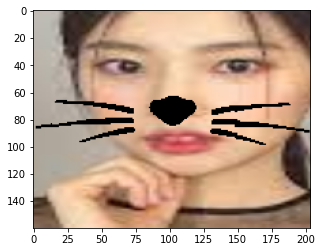

In [110]:
#maskÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú img1ÏùÑ grayÎ°ú Î≥ÄÍ≤Ω
mask_hyem = cv2.cvtColor(rot_sticker, cv2.COLOR_BGR2GRAY)
#ret, mask_hyem = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)


#bitwise_and Ïó∞ÏÇ∞ÏûêÎäî ÎëòÎã§ 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå Í∞íÏùÑ ÌÜµÍ≥º ÏãúÌÇ¥.
#Ï¶â maskÍ∞Ä Í≤ÄÏ†ïÏÉâÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌÜµÍ≥ºÍ∞Ä ÎêòÍ∏∞ÎïåÎ¨∏Ïóê maskÏòÅÏó≠ Ïù¥Ïô∏Îäî Î™®Îëê Ï†úÍ±∞Îê®.
sticker_area_hyem = cv2.bitwise_and(sticker_area_hyem, sticker_area_hyem, mask=mask_hyem)

print('sticker_area_hyem')
plt.imshow(sticker_area_hyem)
plt.show()

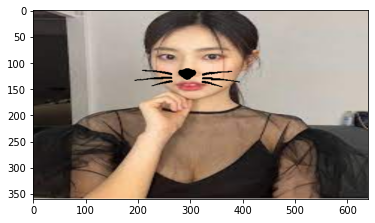

In [111]:
img_rgb_hyem[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right] = np.where(sticker_area_hyem == 1, sticker_area_hyem, sticker_area_hyem).astype(np.uint8)
plt.imshow(img_rgb_hyem)
plt.show()

> rectangleÏùò ÏòÅÏó≠Ïù¥ Ïã§Ï†ú ÏñºÍµ¥Î≥¥Îã§ Ï¢ÅÍ≤å Ïù∏ÏãùÎêòÏñ¥ Ïù¥ÎØ∏ÏßÄÏùò xÏ∂ïÏù¥ Ï§ÑÏñ¥Îì§ÏóàÏúºÎÇò, ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨Ïö©Ìïú Ï¢åÌëúÏÑ§Ï†ïÏùÄ Ïûò ÎèôÏûëÌïòÏòÄÎã§.

### 2. Í∏∞Ïö∏Ïñ¥ÏßÑ ÏñºÍµ¥ + ÌÅ¥Î°úÏ¶à ÏïÑÏõÉ

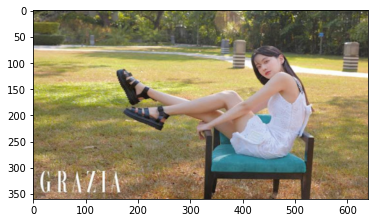

In [129]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/Ohyeon1.jpg'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show_oh = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show_oh = cv2.cvtColor(img_show_oh, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb_oh = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_oh) 
plt.show()

rectangles[[(425, 94) (461, 130)]]


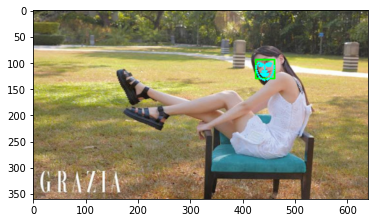

In [130]:
# ÏñºÍµ¥Ïù∏Ïãù
dlib_rects = detector_hog(img_show_oh, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show_oh,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
list_landmarks_oh = []

# ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show_hyem, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_oh.append(list_points)

    
# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ    
for landmark in list_landmarks_oh:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_oh, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show_oh)
plt.show()

> rectangles Í∞ùÏ≤¥Í∞Ä ÏÉùÏÑ±ÎêòÏóàÏúºÎÇò ÌéòÏù¥Ïä§ ÎûúÎìúÎßàÌÅ¨ ÏÉùÏÑ±Ïãú ÏñºÍµ¥Ïùò Í∏∞Ïö∏Í∏∞Î•º Ï†ïÌôïÌûà Ïù∏ÏãùÌïòÏßÄ Î™ªÌñàÎã§.
ÏÇ¨ÏßÑÏùò ÌÅ¨Í∏∞Î•º ÌÇ§ÏõåÎ≥∏Îã§.

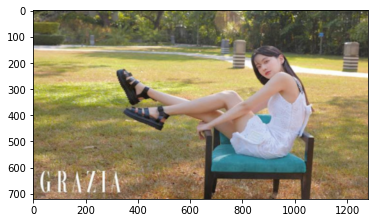

In [131]:
img_bgr = cv2.resize(img_bgr, (1280, 720))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show_oh = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show_oh = cv2.cvtColor(img_show_oh, cv2.COLOR_BGR2RGB)

# Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb_oh = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_oh) 
plt.show()

rectangles[[(851, 188) (925, 262)]]


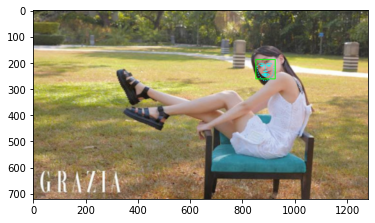

In [132]:
dlib_rects = detector_hog(img_show_oh, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show_oh,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
list_landmarks_oh = []

# ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_show_hyem, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_oh.append(list_points)

    
# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ    
for landmark in list_landmarks_oh:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show_oh, point, 2, (0, 255, 255), -1) # yellow

plt.imshow(img_show_oh)
plt.show()

> Ïó¨Ï†ÑÌûà Í∞ôÏùÄ Ï¶ùÏÉÅÏù¥ ÎÇòÌÉÄÎÇúÎã§. Ïù¥ Î∂ÄÎ∂ÑÏùÄ face landmarkÏùò ÏÉùÏÑ±Î∞©ÏãùÏóê ÎåÄÌïú Í≥µÎ∂ÄÍ∞Ä ÌïÑÏöîÌï† Í≤É Í∞ôÎã§. 

x_nose, y_nose: (888, 235)
(x_right): 919
(y_bottm): 268
50 46


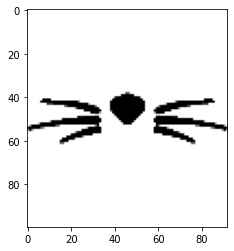

h, w: 2, 136
angle: 0.8425242607404145
M: [[ 0.99989189  0.01470429 -0.67099175]
 [-0.01470429  0.99989189  0.74018786]]


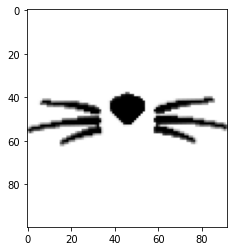

(refind_x_left,right): (842, 934)
(refind_y_top,bottm): (185, 285)
sticker_area


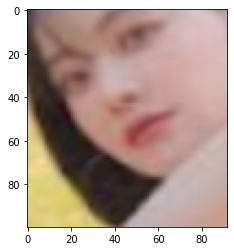

In [133]:
# Ïù¥ÎØ∏ÏßÄ Ìï©ÏÑ±Ïóê ÏÇ¨Ïö©Îê† ÎûúÎìúÎßàÌÅ¨ ÏßÄÏ†ï
for dlib_rect, list_landmarks_oh  in zip(dlib_rects, list_landmarks_oh ):
    # Ïù¥ÎØ∏ÏßÄ Îì§Ïñ¥Í∞à ÎûúÎìúÎßàÌÅ¨
    x_nose = landmark[33][0]
    y_nose = landmark[33][1]
    x_right = landmark[14][0]
    y_bottom = landmark[8][1]
    
    print(f'x_nose, y_nose: {x_nose, y_nose}')
    print(f'(x_right): {x_right }')
    print(f'(y_bottm): {y_bottom}')

# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers2.png'
img_sticker = cv2.imread(sticker_path)    
    
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï
size_ratio = 1.5 # Ïù¥ Í∞íÏùÑ Ï°∞Ï†àÌïòÏó¨ Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÎπÑÏú®Î°ú Ï†ïÌï† Ïàò ÏûàÎã§.
half_x , half_y = round((x_right - x_nose)*size_ratio), round((y_bottom - y_nose)*size_ratio) # Ìï©ÏÑ± Ïù¥ÎØ∏ÏßÄÏùò Í∞ÄÎ°ú,ÏÑ∏Î°ú 1/2 Í∏∏Ïù¥ ÏÇ∞Ï∂ú
print(half_y, half_x)
img_sticker = cv2.resize(img_sticker, (half_x * 2, half_y * 2)) # ÏñºÍµ¥ Ïù∏Ïãù ÏòÅÏó≠Ïóê ÎßûÏ∂∞ÏÑú Ïä§Ìã∞Ïª§ÌÅ¨Í∏∞ Ï°∞Ï†ï
plt.imshow(img_sticker)
plt.show()
    
# Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Í∏∞Ïö∏Ïù¥Í∏∞
h =  y_right_eye - y_left_eye
w =  x_right_eye - x_left_eye
print(f'h, w: {h}, {w}')
angle = math.atan(h/w)/math.pi*180 
print(f'angle: {angle}')
M = cv2.getRotationMatrix2D((img_sticker.shape[0]/2,img_sticker.shape[1]/2), angle, 1.0)
print(f'M: {M}')
rot_sticker = cv2.warpAffine(img_sticker, M,(img_sticker.shape[1], img_sticker.shape[0]), borderValue=(255,255,255))
plt.imshow(rot_sticker)
plt.show()    
    
# sticker_area ÏÑ§Ï†ï: y,xÏàú
refind_y_top = y_nose - half_y
refind_y_bottom = refind_y_top + img_sticker.shape[0] 
refind_x_left = x_nose - half_x
refind_x_right = refind_x_left + img_sticker.shape[1]
print(f'(refind_x_left,right): {refind_x_left, refind_x_right }')
print(f'(refind_y_top,bottm): {refind_y_top, refind_y_bottom}')

# img_rgbÏóêÏÑú stickerÍ∞Ä Î∂ôÏùÑ ÏòÅÏó≠ ÏßÄÏ†ïÌïòÍ∏∞
sticker_area_oh = img_rgb_oh[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right]
print('sticker_area')
plt.imshow(sticker_area_oh)
plt.show()

sticker_area_oh


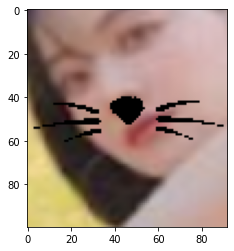

In [134]:
#maskÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ÏÑú Ïù¥ÎØ∏ÏßÄÎ•º grayÎ°ú Î≥ÄÍ≤Ω
mask_oh = cv2.cvtColor(rot_sticker, cv2.COLOR_BGR2GRAY)
#ret, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

#bitwise_and Ïó∞ÏÇ∞ÏûêÎäî ÎëòÎã§ 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå Í∞íÏùÑ ÌÜµÍ≥º ÏãúÌÇ¥.
#Ï¶â maskÍ∞Ä Í≤ÄÏ†ïÏÉâÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌÜµÍ≥ºÍ∞Ä ÎêòÍ∏∞ÎïåÎ¨∏Ïóê maskÏòÅÏó≠ Ïù¥Ïô∏Îäî Î™®Îëê Ï†úÍ±∞Îê®.
sticker_area_oh = cv2.bitwise_and(sticker_area_oh, sticker_area_oh, mask=mask_oh)

print('sticker_area_oh')
plt.imshow(sticker_area_oh)
plt.show()

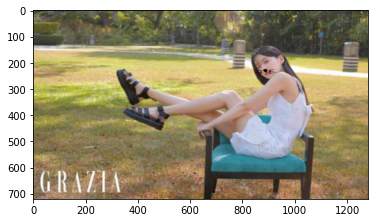

In [135]:
img_rgb_oh[refind_y_top:refind_y_bottom, refind_x_left:refind_x_right] = np.where(sticker_area_oh == 1, sticker_area_oh, sticker_area_oh).astype(np.uint8)
plt.imshow(img_rgb_oh)
plt.show()

> ÏñºÍµ¥Ïù¥ **Í∏∞Ïö∏Ïñ¥ÏßÄÍ≥†, ÌÅ¥Î°úÏ¶à ÏïÑÏõÉÎêú Ïù¥ÎØ∏ÏßÄ**ÏóêÏÑúÎèÑ **ÏΩîÎÅùÏùÑ Ï§ëÏã¨ÏúºÎ°ú Ìïú Ï¢åÌëúÏÑ§Ï†ïÏù¥ Ïûò ÏûëÎèô**ÌïòÏòÄÎã§.
ÌïòÏßÄÎßå ÏñºÍµ¥Ïù∏ÏãùÏãú ÌéòÏù¥Ïä§ ÎûúÎìúÎßàÌÅ¨Í≤å Ïò¨Î∞îÎ•¥Í≤å ÌòïÏÑ±ÎêòÏßÄ ÏïäÏùÄ Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ **Ïä§Ìã∞Ïª§Ïùò Í∏∞Ïö∏Í∏∞Îäî ÎπÑÏ†ïÏÉÅÏ†ÅÏúºÎ°ú ÏûëÎèô**ÌïòÏòÄÎã§.
Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏùò **ÏñºÍµ¥Ïù¥ Ï∏°Î©¥ÏóêÏÑú Ï¥¨ÏòÅÎêú Í≤ÉÏùÑ ÌéòÏù¥Ïä§ ÎûúÎìúÎßàÌÅ¨Í∞Ä Ïò¨Î∞îÎ•¥Í≤å Î∞òÏòÅÌïòÏßÄ Î™ªÌïòÎäî Ï†ê**ÏùÑ Ìï¥Í≤∞Ìï¥Ïïº Ï†ïÏÉÅÏ†ÅÏù∏ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ Í≤ÉÏù¥Îã§.

## ÌõÑÍ∏∞
-----

> Ïù¥Î≤à exploration ÎÖ∏ÎìúÎèÑ ÏßÑÌñâÌïòÎã§Î≥¥Îãà Ïó¨Îü¨Î≤àÏùò ÎÇúÍ¥ÄÏù¥ ÏûàÏóàÏßÄÎßå Í∑∏ÎûòÎèÑ ÌïòÎÇòÏî© Ìï¥Í≤∞ÎêòÎ©∞ ÎÖ∏ÎìúÎ•º ÎßàÎ¨¥Î¶¨ Ìï† Ïàò ÏûàÏóàÎã§.   
ÏßÑÌñâÏ§ëÏóê Í≤™ÏóàÎçò Ïù¥ÏäàÏÇ¨Ìï≠Îì§ÏùÑ ÌïòÎÇòÏî© Ï†ïÎ¶¨Ìï¥Î≥∏Îã§.

### ÎÇúÍ¥Ä 1. ÏñºÍµ¥Ïù∏ÏãùÏù¥ Ïò¨Î∞îÎ•¥Í≤å Ï†ÅÏö©ÎêòÎäî Ïù¥ÎØ∏ÏßÄÎ•º ÏàòÏßëÌïòÍ∏∞

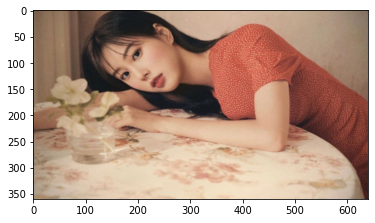

In [82]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/hyemmu1.png'
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED)    #- OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show1 = img_bgr.copy()      #- Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä
img_show1 = cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)

# ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄ RGBÎ°ú Î≥ÄÍ≤Ω 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_show1) 
plt.show()

rectangles[]


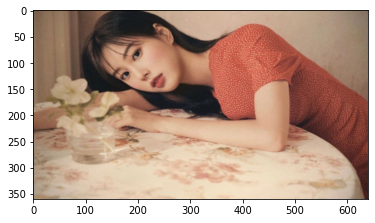

In [83]:
dlib_rects1 = detector_hog(img_show1, 1)

print(dlib_rects1)

for dlib_rect in dlib_rects1:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show1,(l,t), (r,b), (0, 255,0), 2, lineType=cv2.LINE_AA)
    
list_landmarks = []
# ÏÇ¨ÏßÑÏóêÏÑú ÏñºÍµ¥ Ïù∏ÏãùÌïòÏó¨ ÎûúÎìúÎßàÌÅ¨ Ï¢åÌëú ÏÉùÏÑ±
for dlib_rect in dlib_rects1:
    points = landmark_predictor(img_show1, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show1, point, 2, (0, 255, 255), -1) # yellow

# ÏÉùÏÑ±Îêú ÎûúÎìúÎßàÌÅ¨Î•º ÏÇ¨ÏßÑ ÏúÑÏóê ÌëúÌòÑ
plt.imshow(img_show1)
plt.show()    

ÏñºÍµ¥Ïù∏ÏãùÏóê Ïã§Ìå®ÌïòÏó¨ rectangles Í∞ùÏ≤¥Í∞Ä ÏïÑÎ¨¥Îü∞ ÏöîÏÜåÎèÑ Í∞ñÍ≥† ÏûàÏßÄ ÏïäÎã§.

#### Ïù¥Ï≤òÎüº ÏàòÏßëÌïú Ïù¥ÎØ∏ÏßÄÏóê ÏñºÍµ¥Ïù∏ÏãùÏùÑ ÏãúÎèÑÌïòÎã§Î≥¥Î©¥ Ïó¨Îü¨Í∞ÄÏßÄ Ïã§Ìå® ÏºÄÏù¥Ïä§Îì§Ïù¥ Î∞úÏÉùÌñàÎã§.

1. Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï Í≥ºÏ†ïÏóêÏÑú Í∞ÄÎ°úÏÑ∏Î°ú ÎπÑÏú® Ïú†ÏßÄ Ïã§Ìå®
2. rectangles Í∞ùÏ≤¥ ÏÉùÏÑ± Ïã§Ìå®
3. ÏñºÍµ¥Ïù¥ ÏïÑÎãå ÏúÑÏπòÏóê rectangles ÏÉùÏÑ±
4. ÏñºÍµ¥Ïùò ÏùºÎ∂ÄÎ∂ÑÏóêÎßå rectangles ÏÉùÏÑ±
5. rectagles Í∞ùÏ≤¥ ÏÉùÏÑ± ÌñàÏúºÎÇò ÌéòÏù¥Ïä§ ÎûúÎìúÎßàÌÅ¨Î•º ÌãÄÎ¶¨Í≤å ÏÉùÏÑ±

4Î≤àÍ≥º 5Î≤àÏùò Í≤ΩÏö∞ ÏïûÏÑú Î∞òÎåÄÎ∞©Ìñ•ÏñºÍµ¥ Ïù∏Ïãù ÌÖåÏä§Ìä∏ÏóêÏÑúÏ≤òÎüº Ïù¥ÌõÑÏùò ÏûëÏóÖÏóê ÏßÄÏû•Ïù¥ ÏóÜÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏóàÏúºÎÇò, 1~3Î≤àÏùò ÏºÄÏù¥Ïä§Îäî Í∑∏ Ïù¥ÌõÑÏùò Îã®Í≥ÑÎ°ú Ï†ÑÌòÄ ÏßÑÌñâÌï† Ïàò ÏóÜÍ≥†, 4Î≤àÏùò Í≤ΩÏö∞ÎèÑ ÎÜíÏùÄ ÌôïÎ•†Î°ú Îã§Ïùå Îã®Í≥ÑÎ°ú ÏßÑÌñâÌï† Ïàò ÏóÜÏóàÎã§. 

Ïù¥ÏôÄ Í∞ôÏùÄ Ïã§Ìå® ÏºÄÏù¥Ïä§Ïóê Ìï¥ÎãπÌïòÏßÄ ÏïäÎäî Ï†ïÏÉÅÏ†ÅÏù∏ ÏºÄÏù¥Ïä§Î•º Ï∞æÎäî Í≤ÉÏù¥ ÏÉùÍ∞Å Ïù¥ÏÉÅÏúºÎ°ú ÏãúÍ∞ÑÏù¥ Í±∏Î†∏ÎäîÎç∞, ÎßåÏïΩ ÏïûÏúºÎ°ú ÏûàÏùÑ Ìï¥Ïª§ÌÜ§ÏóêÏÑú **ÏñºÍµ¥Ïù∏ÏãùÏùÑ ÌôúÏö©Ìïú Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ Í∞úÎ∞úÌïòÍ≤å ÎêúÎã§Î©¥ Î®ºÏ†Ä ÏñºÍµ¥Ïù∏ÏãùÏùò ÏÑ±Í≥µÎ•†ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌïú Î∞©ÏïàÏùÑ Ï∞æÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥Ïïº**Ìï† Í≤É Í∞ôÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑ† dlib.get_frontal_face_detectorÏóê ÎåÄÌïú ÌôïÏã§Ìïú Ïù¥Ìï¥Í∞Ä ÌïÑÏöîÌï† Í≤ÉÏù¥Îã§.

### ÎÇúÍ¥Ä 2. ÎÖ∏ÎìúÏùò ÏòàÏ†úÏΩîÎìú Ïù¥Ìï¥ÌïòÍ∏∞

Ïù¥Î≤à ÎÖ∏ÎìúÏóêÏÑúÎäî ÏòàÏ†úÏΩîÎìúÏùò ÏùòÎØ∏Î•º Ïù¥Ìï¥ÌïòÎäîÎç∞ Îß§Ïö∞ ÎßéÏùÄ ÏãúÍ∞ÑÏùÑ Ìï†Ïï†ÌñàÎã§.
ÌäπÌûà **Ìï©ÏÑ±Ìï† Ïù¥ÎØ∏ÏßÄÏùò Í∏∞Ï§ÄÏ†êÏùÑ Ïû°Îäî Î∂ÄÎ∂ÑÏùò ÏΩîÎìúÏßÑÌñâÏùÑ Ïù¥Ìï¥ÌïòÎäîÎç∞ Í≥®Î®∏Î¶¨**Î•º ÏïìÏïòÎã§.
ÌïúÎèôÏïà Ìó§Îß® ÎÅùÏóê ÏùòÎØ∏Í∞Ä Î∂ÑÎ™ÖÌïú Î≥ÄÏàòÎ™ÖÏùÑ ÏÉàÎ°ú Ìï†ÎãπÌïòÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥Î≥¥Îãà Ï°∞Í∏àÏî© Ïù¥Ìï¥Í∞Ä ÎêòÍ∏∞ ÏãúÏûëÌñàÎã§.

**Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò Ï¢åÌëúÎ•º ÏÑ§Ï†ïÌïú Î∞©ÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.**

1. ```python
      x_nose = landmark[33][0]
      y_nose = landmark[33][1]
      x_right = landmark[14][0]
      y_bottom = landmark[8][1]
   ```
   
   **ÏΩîÎÅù(landmark[33])Ïùò x,y**Ï¢åÌëú, **Ïò§Î•∏Ï™Ω Î≥º(landmark[14])Ïùò x**Ï¢åÌëú, **ÌÑ±ÎÅù(landmark[8])Ïùò y**Ï¢åÌëúÎ•º Í∞ÅÍ∞Å x/y_nose, x_right, y_bottomeÏóê Ìï†Îãπ 
2. 
   ```python
   half_x = round((x_right - x_nose)*size_ratio)     # Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò x Í∏∏Ïù¥ * 0.5
   half_y = round((y_bottom - y_nose)*size_ratio)    # Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò y Í∏∏Ïù¥ * 0.5
   ```
   Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º ÏúÑ Îëê Î≥ÄÏàò Í∞íÏùò ÎëêÎ∞∞Î°ú Î¶¨ÏÇ¨Ïù¥Ïßï ÌïúÎã§. Ïù¥Îïå size_ratioÏóê Ïù¥ÎØ∏ÏßÄÏùò ÎπÑÏú®ÏùÑ Ï†ïÌï¥Ï£ºÎ©¥ Í∑∏ÎßåÌÅº ÌôïÎåÄ, Ï∂ïÏÜå ÎêúÎã§.
3. ```python 
   x_left = x_nose - half_x  # Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò x ÏõêÏ†ê 
   y_top = y_nose - half_y   # Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò y ÏõêÏ†ê
   ```
   **x_left + Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò x Í∏∏Ïù¥, y_top + Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏùò yÍ∏∏Ïù¥**Î°ú Ïù¥ÎØ∏ÏßÄÍ∞Ä **Ìï©ÏÑ±Îê† ÏòÅÏó≠**ÏùÑ Íµ¨Ìï† Ïàò ÏûàÎã§. 

### ÎÇúÍ¥Ä 3. png Ïù¥ÎØ∏ÏßÄÏùò Î∞∞Í≤ΩÏùÑ Ìà¨Î™ÖÌïòÍ≤å ÎßåÎì§Í∏∞

ÎÖ∏ÎìúÏóêÏÑú Ï†úÍ≥µÌïú **Ïù¥ÎØ∏ÏßÄÏùò ÌòïÏãùÏù¥ png**ÏòÄÏúºÎØÄÎ°ú, Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î∞∞Í≤ΩÏù¥ Ìà¨Î™ÖÏúºÎ°ú Ï≤òÎ¶¨ÎêòÏñ¥ ÏûàÏùÑ Í≤ÉÏù¥Îùº ÏòàÏÉÅÌñàÏßÄÎßå Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄÎ•º Ìï©ÏÑ±Ìïú Í≤∞Í≥ºÎäî **Ìù∞ÏÉâÏùò Î∂àÌà¨Î™ÖÌïú ÌîΩÏÖÄ**Îì§Ïù¥ Í∞ÄÎìù Ï∞®ÏûàÏóàÎã§.

Ï≤òÏùåÏóêÎäî Ïù¥ÎØ∏ÏßÄÎ•º Î°úÎìúÌï† Îïå alpha Ï±ÑÎÑêÏùÑ ÏÇ¥Î¶¨ÏßÄ ÏïäÏùÄ Í≤ÉÏù¥ Î¨∏Ï†úÏù∏ Ï§ÑÏïåÍ≥†

```python
img_bgr = cv2.imread(my_image_path,cv2.IMREAD_UNCHANGED) # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò ÌòïÏãùÏùÑ Í∑∏ÎåÄÎ°ú Î≥¥Ï°¥
img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2BGRA)      # BGR -> BGRA  
img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_BGRA2RGBA)     # BGRA -> RGBA
```
ÏúÑÏôÄ Í∞ôÏù¥ alpha Ï±ÑÎÑêÏùÑ Í∞ÄÏßÑ RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌï¥Ï£ºÏóàÏúºÎÇò, Ìï©ÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÏùò Î∞∞Í≤ΩÏùÄ Í∑∏ÎåÄÎ°ú ÏòÄÎã§.

Í≥†ÎØºÎÅùÏóê Ï∞æÏïÑÎÇ∏ Î∞©Î≤ïÏùÄ ÏïÑÎûòÏ≤òÎüº cv2.bitwise_and Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï¥ Ìï©ÏÑ±Îê† Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í≤ÄÏ†ïÏÉâÏù∏ Î∂ÄÎ∂ÑÎßå sticker_areaÏóê ÎÇ®ÎèÑÎ°ù ÌïòÎäî Í≤ÉÏù¥ÏóàÎã§.

```python
mask = cv2.cvtColor(rot_sticker, cv2.COLOR_BGR2GRAY)

sticker_area = cv2.bitwise_and(sticker_area, sticker_area, mask=mask)
```

Ïù¥Î≤à ÎÖ∏ÎìúÏóê ÏÇ¨Ïö©Îêú Ïä§Ìã∞Ïª§Ïù¥ÎØ∏ÏßÄÍ∞Ä Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌùëÎ∞±Ïù¥Ïñ¥ÏÑú grayscaleÎßå ÏàòÌñâÌïòÏó¨ÎèÑ ÎßàÏä§ÌÅ¨Ïùò Ïó≠Ìï†ÏùÑ Ïûò ÏàòÌñâÌïòÏòÄÎã§.
Ïª¨Îü¨Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÏö∞ [Ï∂îÍ∞ÄÏ†ÅÏù∏ Í∞ÄÍ≥µ](https://opencv-python.readthedocs.io/en/latest/doc/07.imageArithmetic/imageArithmetic.html#id3)Ïù¥ Îçî ÌïÑÏöîÌïòÎã§.

### Ïù¥Î≤à ÎÖ∏ÎìúÎ•º ÌÜµÌï¥ Î∞∞Ïö¥ Í≤ÉÎì§

#### 1. dlib ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©   
   1) regtangles Í∞ùÏ≤¥ Îã§Î£®Í∏∞   
   2) face landmark Îã§Î£®Í∏∞   
   

#### 2. cv2 ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÇ¨Ïö©   
   1) Ïù¥ÎØ∏ÏßÄÏùò Ïª¨Îü¨Ïä§ÌéòÏù¥Ïä§ Îã§Î£®Í∏∞   
   2) Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞, Í∏∞Ïö∏Í∏∞ Ï°∞Ï†à   
   3) ÎπÑÌä∏ÏôÄÏù¥Ï¶à Ïï§Îìú Ïó∞ÏÇ∞ÏùÑ ÌÜµÌïú Î∞∞Í≤Ω Ï†úÍ±∞ Î∞è Ìï©ÏÑ±   


### ÏïÑÏâ¨Ïõ†Îçò Í≤É Î∞è ÎäêÎÇÄÏ†ê

#### 1. rectangles Í∞ùÏ≤¥ Î∞è ÌéòÏù¥Ïä§ ÎûúÎìúÎßàÌÅ¨Í∞Ä ÏÉùÏÑ±ÎêòÎäî Í≥ºÏ†ïÏóê ÎåÄÌïú Ïù¥Ìï¥Í∞Ä Î∂ÄÏ°±ÌïòÎã§.
Ïù¥ÌõÑÏùò Î™®Îì† ÏûëÏóÖÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í∞ÄÏû• Ï§ëÏöîÌïú Îç∞Ïù¥ÌÑ∞Ï≤òÎ¶¨ Í≥ºÏ†ïÏù¥ÏßÄÎßå, ÎÖ∏ÎìúÏùò ÏôÑÏÑ±Ïù¥ Î≥¥Îã§ Ï§ëÏöîÌïú Î™©ÌëúÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê ÍπäÏù¥ ÏûàÍ≤å ÌååÍ≥†Îì§Ïàò ÏóÜÏóàÎã§. ÏôÑÏÑ±ÎèÑ ÏûàÎäî ÏñºÍµ¥Ïù∏Ïãù Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùò Í∞úÎ∞úÏùÑ Î™©ÌëúÎ°ú ÌïúÎã§Î©¥ Ìïú Î≤àÏùÄ Ï†úÎåÄÎ°ú Í≥µÎ∂ÄÌï¥ÏïºÍ≤†Îã§Îäî ÌåêÎã®Ïù¥ Îì§ÏóàÎã§.

#### 2. Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò ÏûêÎ£åÍµ¨Ï°∞Í∞Ä ÎÇØÏÑ§Ïñ¥ÏÑú Í∞ÅÏ¢Ö Î©îÏÜåÎìúÎ•º Î≥º Îïå Ïù¥Ìï¥ÌïòÎäîÎç∞ ÏãúÍ∞ÑÏùò ÏÜåÏöîÍ∞Ä ÎßéÏïòÎã§.
Ïù¥ÎØ∏ÏßÄÍ∞Ä Îß§Ìä∏Î¶≠Ïä§ ÌòïÌÉúÏùò Î∞∞Ïó¥ Í∞ùÏ≤¥ÎùºÎäî Í≤ÉÏùÄ ÏïåÍ≥† ÏûàÏßÄÎßå, Í∑∏Í≤ÉÏùÑ Ï≤òÎ¶¨ÌïòÎäî Í≥ºÏ†ïÏùÑ 100% Îã§ Ïù¥Ìï¥Ìï† ÏàòÎäî ÏóÜÏóàÎã§. Ïù¥ÎØ∏ ÎßåÎì§Ïñ¥ÏßÑ Î©îÏÜåÎìúÎì§Ïùò ÏÇ¨Ïö©Î≤ïÏùÑ ÏùµÌûàÎäî Í≤É ÎßåÏúºÎ°úÎèÑ Ïù¥Î≤à ÎÖ∏ÎìúÎ•º ÏßÑÌñâÌï¥ÎÇº Ïàò ÏûàÏóàÏßÄÎßå, Î≥¥Îã§ Îä•ÏàôÌïú Ï≤òÎ¶¨Î•º ÏúÑÌï¥ÏÑúÎäî Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò ÏûêÎ£åÍµ¨Ï°∞Ïóê ÎåÄÌïú Ïù¥Ìï¥ÎèÑÎ•º Îçî ÎÜíÏó¨Ïïº Ìï† Í≤ÉÏù¥Îã§.
